<a href="https://colab.research.google.com/github/Captsahil/Marketing-Research-Method-Sahil-Bharadwaj/blob/main/Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

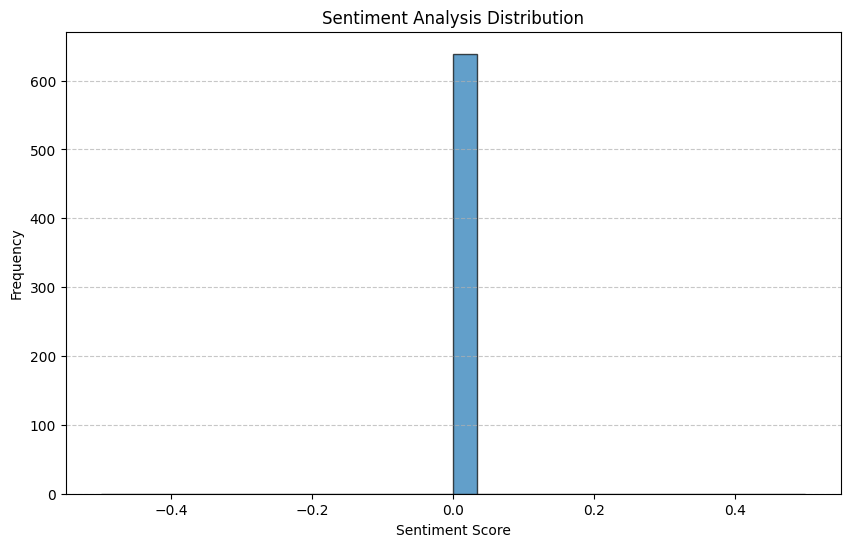

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "Reviews 500.csv"  # Ensure the file is in the current directory
df = pd.read_csv(file_path, low_memory=False)  # Prevent mixed type warning

# Ensure the correct column name for comments
comment_column = df.columns[0]  # Assuming the first column contains comments

# Handle missing values
df = df.dropna(subset=[comment_column])

# Function to get sentiment score
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity  # Polarity score (-1 to 1)

# Apply sentiment analysis
df["Sentiment Score"] = df[comment_column].astype(str).apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df["Sentiment Score"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


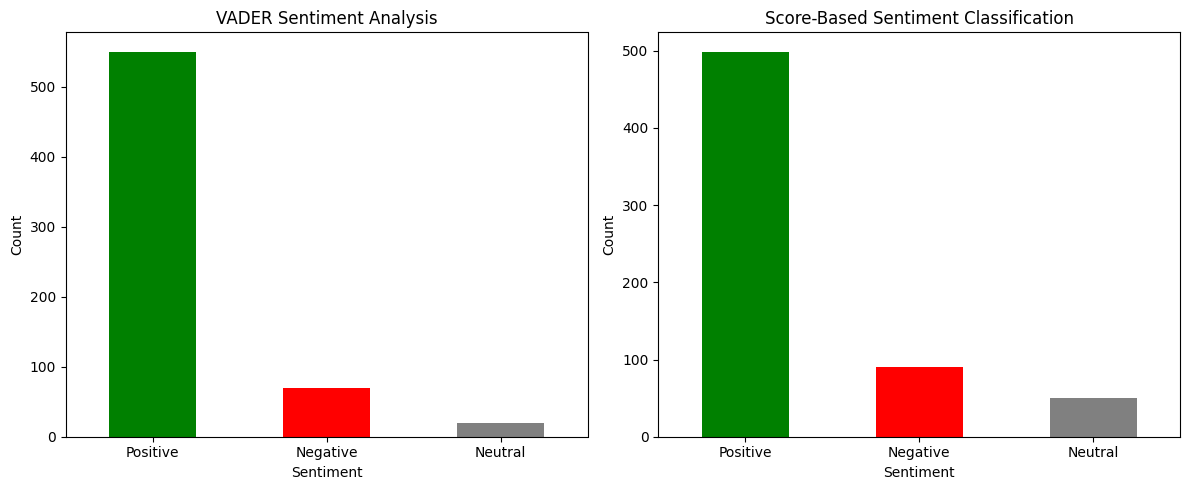

                                                 Text  Score Score_Sentiment  \
0   I have bought several of the Vitality canned d...      5        Positive   
1   Product arrived labeled as Jumbo Salted Peanut...      1        Negative   
2   This is a confection that has been around a fe...      4        Positive   
3   If you are looking for the secret ingredient i...      2        Negative   
4   Great taffy at a great price.  There was a wid...      5        Positive   
5   I got a wild hair for taffy and ordered this f...      4        Positive   
6   This saltwater taffy had great flavors and was...      5        Positive   
7   This taffy is so good.  It is very soft and ch...      5        Positive   
8   Right now I'm mostly just sprouting this so my...      5        Positive   
9   This is a very healthy dog food. Good for thei...      5        Positive   
10  I don't know if it's the cactus or the tequila...      5        Positive   
11  One of my boys needed to lose some w

In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon (Run this only in Google Colab)
nltk.download('vader_lexicon')

# Load the dataset
file_path = "/content/Reviews 500.csv"  # Adjust if needed
df = pd.read_csv(file_path)

# Ensure the dataset has the correct columns
if 'Text' not in df.columns or 'Score' not in df.columns:
    print("Error: Dataset must contain 'Text' and 'Score' columns")
else:
    # Initialize Sentiment Analyzer
    sia = SentimentIntensityAnalyzer()

    # Function to compute sentiment using VADER
    def get_vader_sentiment(text):
        score = sia.polarity_scores(str(text))  # Convert to string
        if score['compound'] >= 0.05:
            return "Positive"
        elif score['compound'] <= -0.05:
            return "Negative"
        else:
            return "Neutral"

    # Apply VADER sentiment analysis
    df['VADER_Sentiment'] = df['Text'].apply(get_vader_sentiment)

    # Convert "Score" into categorical sentiment
    def get_score_sentiment(score):
        if score >= 4:
            return "Positive"
        elif score == 3:
            return "Neutral"
        else:
            return "Negative"

    df['Score_Sentiment'] = df['Score'].apply(get_score_sentiment)

    # Count sentiment distribution
    vader_sentiment_counts = df['VADER_Sentiment'].value_counts()
    score_sentiment_counts = df['Score_Sentiment'].value_counts()

    # Plot Sentiment Analysis Results
    plt.figure(figsize=(12, 5))

    # VADER Sentiment Distribution
    plt.subplot(1, 2, 1)
    vader_sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title("VADER Sentiment Analysis")
    plt.xticks(rotation=0)

    # Score-Based Sentiment Distribution
    plt.subplot(1, 2, 2)
    score_sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title("Score-Based Sentiment Classification")
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

    # Show Sample Results
    print(df[['Text', 'Score', 'Score_Sentiment', 'VADER_Sentiment']].head(20))

<ipython-input-8-02e3b82880d9>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


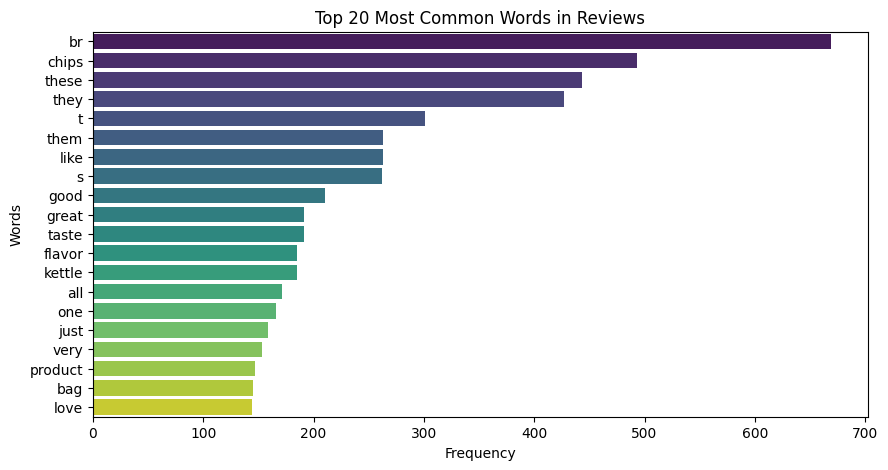

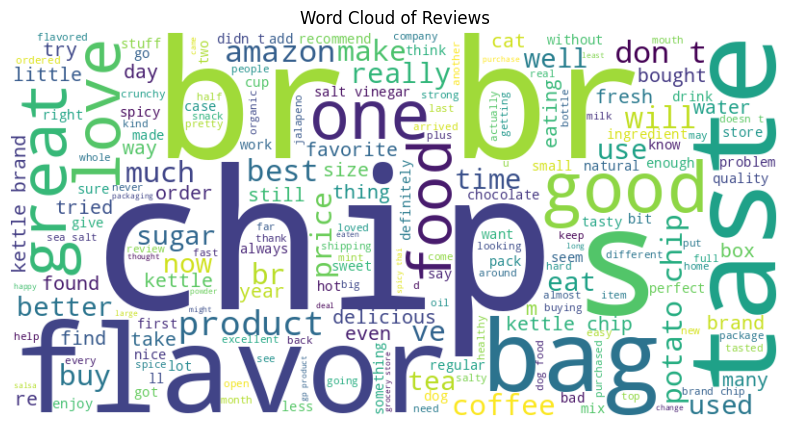

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import re

# Load the dataset
file_path = "/content/Reviews 500.csv"
df = pd.read_csv(file_path)

# Define a basic stopword list (since we cannot download nltk's stopwords)
manual_stopwords = set([
    "the", "a", "and", "is", "in", "it", "to", "of", "for", "on", "this", "that",
    "with", "as", "are", "was", "but", "at", "by", "an", "be", "or", "so", "if",
    "out", "not", "you", "your", "we", "from", "can", "have", "has", "i", "me", "my"
])

# Text Cleaning Function (Without `nltk`)
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = text.split()  # Split words manually
    tokens = [word for word in tokens if word not in manual_stopwords]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Word Frequency Analysis
all_words = ' '.join(df['Cleaned_Text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

# Plot Most Common Words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Common Words in Reviews")
plt.show()

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

# N-gram Analysis (Bigrams & Trigrams)
def get_ngrams(text_series, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngram_matrix = vectorizer.fit_transform(text_series)
    ngram_counts = ngram_matrix.sum(axis=0)
    ngram_freq = [(word, ngram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:10]

bigrams = get_ngrams(df['Cleaned_Text'], 2)
trigrams = get_ngrams(df['Cleaned_Text'], 3)

# Display Bigrams and Trigrams
bigram_df = pd.DataFrame(bigrams, columns=["Bigram", "Frequency"])
trigram_df = pd.DataFrame(trigrams, columns=["Trigram", "Frequency"])

import ace_tools as tools
tools.display_dataframe_to_user(name="Bigram Analysis", dataframe=bigram_df)
tools.display_dataframe_to_user(name="Trigram Analysis", dataframe=trigram_df)


In [ ]:
pip install nrclex

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from nrclex import NRCLex

# Load the dataset
file_path = "/content/Reviews 500.csv"
df = pd.read_csv(file_path)

# Ensure the dataset has a 'Text' column
if 'Text' in df.columns:
    # Text Cleaning Function
    def preprocess_text(text):
        text = str(text).lower()  # Convert to lowercase
        text = re.sub(r'\W+', ' ', text)  # Remove special characters
        return text

    # Apply preprocessing
    df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

    # Function to get emotion scores from NRC Lexicon
    def get_emotions(text):
        emotion_scores = NRCLex(text).affect_frequencies
        return emotion_scores

    # Apply emotion analysis
    df['Emotions'] = df['Cleaned_Text'].apply(get_emotions)

    # Convert emotion dictionary to separate columns
    emotion_df = df['Emotions'].apply(pd.Series).fillna(0)

    # Merge back to main dataframe
    df = pd.concat([df, emotion_df], axis=1)

    # Aggregate emotion scores
    emotion_totals = emotion_df.sum()

    # Plot Emotion Analysis
    plt.figure(figsize=(10, 5))
    sns.barplot(x=emotion_totals.index, y=emotion_totals.values, palette="coolwarm")
    plt.xlabel("Emotions")
    plt.ylabel("Frequency")
    plt.title("Emotion Distribution in Reviews")
    plt.xticks(rotation=45)
    plt.show()

    # Display Sample Emotional Classification
    import ace_tools as tools
    tools.display_dataframe_to_user(name="Emotional Analysis Results", dataframe=df[['Text', 'Emotions']].head(20))
else:
    print("Error: Dataset must contain a 'Text' column.")

MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [21]:
pip install ace tools


In [17]:
print(df[['Text', 'Emotions']].head(20))


                                                 Text  \
0   I have bought several of the Vitality canned d...   
1   Product arrived labeled as Jumbo Salted Peanut...   
2   This is a confection that has been around a fe...   
3   If you are looking for the secret ingredient i...   
4   Great taffy at a great price.  There was a wid...   
5   I got a wild hair for taffy and ordered this f...   
6   This saltwater taffy had great flavors and was...   
7   This taffy is so good.  It is very soft and ch...   
8   Right now I'm mostly just sprouting this so my...   
9   This is a very healthy dog food. Good for thei...   
10  I don't know if it's the cactus or the tequila...   
11  One of my boys needed to lose some weight and ...   
12  My cats have been happily eating Felidae Plati...   
13  good flavor! these came securely packed... the...   
14  The Strawberry Twizzlers are my guilty pleasur...   
15  My daughter loves twizzlers and this shipment ...   
16  I love eating them and they

In [15]:
import textblob.download_corpora
textblob.download_corpora.download_all()


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [14]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Download full textblob corpora
from textblob import download_corpora
download_corpora()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


TypeError: 'module' object is not callable

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-22-e1e3f0f2198a>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_totals.index, y=emotion_totals.values, palette="coolwarm")


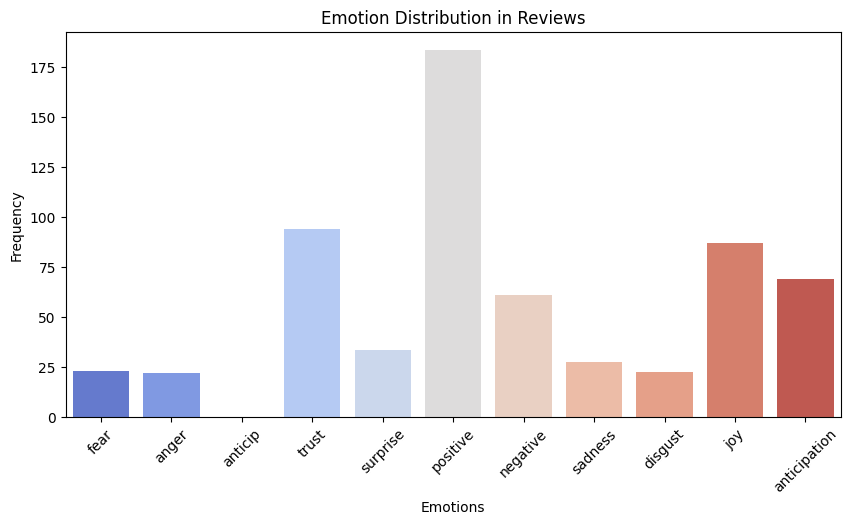

ModuleNotFoundError: No module named 'ace_tools'

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nrclex import NRCLex

# Ensure required NLTK data is available
nltk.download('punkt')

# Load the dataset
file_path = "Reviews 500.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Ensure the dataset has a 'Text' column
if 'Text' in df.columns:
    # Text Cleaning Function
    def preprocess_text(text):
        if pd.isna(text):
            return ""  # Handle NaN values
        text = str(text).lower()  # Convert to lowercase
        text = re.sub(r'\W+', ' ', text)  # Remove special characters
        return text

    # Apply preprocessing
    df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

    # Function to get emotion scores from NRC Lexicon
    def get_emotions(text):
        if not text.strip():
            return {}  # Return empty if text is empty
        emotion_scores = NRCLex(text).affect_frequencies
        return emotion_scores

    # Apply emotion analysis
    df['Emotions'] = df['Cleaned_Text'].apply(get_emotions)

    # Convert emotion dictionary to separate columns
    emotion_df = df['Emotions'].apply(pd.Series).fillna(0)

    # Merge back to main dataframe
    df = pd.concat([df, emotion_df], axis=1)

    # Aggregate emotion scores
    emotion_totals = emotion_df.sum()

    # Plot Emotion Analysis
    plt.figure(figsize=(10, 5))
    sns.barplot(x=emotion_totals.index, y=emotion_totals.values, palette="coolwarm")
    plt.xlabel("Emotions")
    plt.ylabel("Frequency")
    plt.title("Emotion Distribution in Reviews")
    plt.xticks(rotation=45)
    plt.show()

    # Display Sample Emotional Classification
    import ace_tools as tools
    tools.display_dataframe_to_user(name="Emotional Analysis Results", dataframe=df[['Text', 'Emotions']].head(20))
else:
    print("Error: Dataset must contain a 'Text' column.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


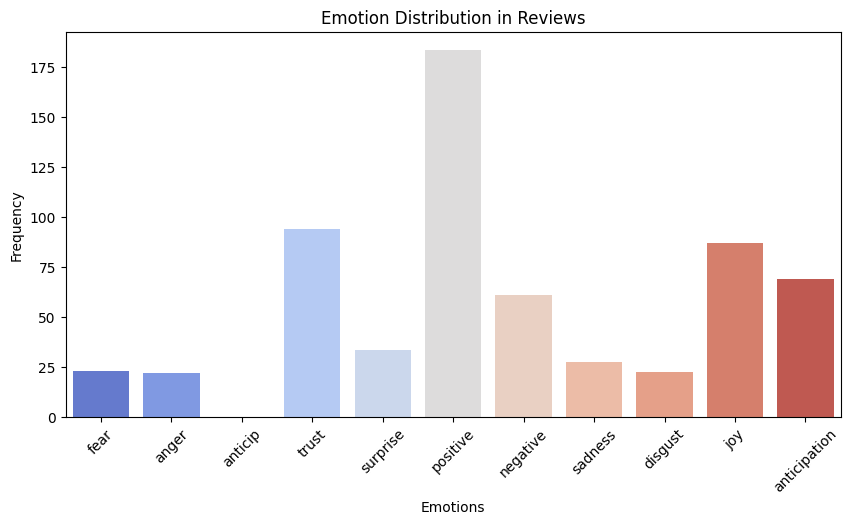

                                                 Text  \
0   I have bought several of the Vitality canned d...   
1   Product arrived labeled as Jumbo Salted Peanut...   
2   This is a confection that has been around a fe...   
3   If you are looking for the secret ingredient i...   
4   Great taffy at a great price.  There was a wid...   
5   I got a wild hair for taffy and ordered this f...   
6   This saltwater taffy had great flavors and was...   
7   This taffy is so good.  It is very soft and ch...   
8   Right now I'm mostly just sprouting this so my...   
9   This is a very healthy dog food. Good for thei...   
10  I don't know if it's the cactus or the tequila...   
11  One of my boys needed to lose some weight and ...   
12  My cats have been happily eating Felidae Plati...   
13  good flavor! these came securely packed... the...   
14  The Strawberry Twizzlers are my guilty pleasur...   
15  My daughter loves twizzlers and this shipment ...   
16  I love eating them and they

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nrclex import NRCLex

# Ensure required NLTK data is available
nltk.download('punkt')

# Load the dataset
file_path = "Reviews 500.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Ensure the dataset has a 'Text' column
if 'Text' in df.columns:
    # Text Cleaning Function
    def preprocess_text(text):
        if pd.isna(text):
            return ""  # Handle NaN values
        text = str(text).lower()  # Convert to lowercase
        text = re.sub(r'\W+', ' ', text)  # Remove special characters
        return text

    # Apply preprocessing
    df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

    # Function to get emotion scores from NRC Lexicon
    def get_emotions(text):
        if not text.strip():
            return {}  # Return empty if text is empty
        emotion_scores = NRCLex(text).affect_frequencies
        return emotion_scores

    # Apply emotion analysis
    df['Emotions'] = df['Cleaned_Text'].apply(get_emotions)

    # Convert emotion dictionary to separate columns
    emotion_df = df['Emotions'].apply(pd.Series).fillna(0)

    # Merge back to main dataframe
    df = pd.concat([df, emotion_df], axis=1)

    # Aggregate emotion scores
    emotion_totals = emotion_df.sum()

    # Plot Emotion Analysis
    plt.figure(figsize=(10, 5))
    sns.barplot(x=emotion_totals.index, y=emotion_totals.values, hue=emotion_totals.index, palette="coolwarm", legend=False)
    plt.xlabel("Emotions")
    plt.ylabel("Frequency")
    plt.title("Emotion Distribution in Reviews")
    plt.xticks(rotation=45)
    plt.show()

    # Display Sample Emotional Classification
    print(df[['Text', 'Emotions']].head(20))
else:
    print("Error: Dataset must contain a 'Text' column.")
